In [ ]:
# Description - This program classifies images into the following category
# ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck]

In [3]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [4]:
# Download dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [18]:
# Log data dimensions
print('Training Data\nCount:', x_train.shape[0], 
      '\nDimension:', x_train.shape[1], 'by', x_train.shape[1],
      '\nCell Array size (RGB):', x_train.shape[3], '\n'
      )
print('Test Data\nCount:', x_test.shape[0], 
      '\nDimension:', x_test.shape[1], 'by', x_test.shape[1],
      '\nCell Array size (RGB):', x_test.shape[3], '\n'
      )

Training Data
Count: 50000 
Dimension: 32 by 32 
Cell Array size (RGB): 3 

Test Data
Count: 10000 
Dimension: 32 by 32 
Cell Array size (RGB): 3 



In [19]:
CLASSIFICATION = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
                  'horse', 'ship', 'truck']

In [20]:
# Convert labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [21]:
# Normalize the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [26]:
# Create model architecture
model = Sequential()

# First layer
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

# Pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# Another convolution layer
model.add(Conv2D(32, (5,5), activation='relu'))

# Another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flattening layer
model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [27]:
# Compile the model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [28]:
# Model Trainning
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 58s 362ms/step - loss: 1.7565 - accuracy: 0.3505 - val_loss: 1.5917 - val_accuracy: 0.4312
Epoch 2/10
157/157 [==============================] - 57s 361ms/step - loss: 1.4174 - accuracy: 0.4830 - val_loss: 1.2853 - val_accuracy: 0.5402
Epoch 3/10
157/157 [==============================] - 56s 359ms/step - loss: 1.2802 - accuracy: 0.5380 - val_loss: 1.1914 - val_accuracy: 0.5795
Epoch 4/10
157/157 [==============================] - 56s 356ms/step - loss: 1.2041 - accuracy: 0.5646 - val_loss: 1.1482 - val_accuracy: 0.5936
Epoch 5/10
157/157 [==============================] - 56s 357ms/step - loss: 1.1098 - accuracy: 0.6070 - val_loss: 1.1407 - val_accuracy: 0.6011
Epoch 6/10
157/157 [==============================] - 56s 360ms/step - loss: 1.0616 - accuracy: 0.6220 - val_loss: 1.0614 - val_accuracy: 0.6273
Epoch 7/10
157/157 [==============================] - 56s 360ms/step - loss: 1.0043 - accuracy: 0.6419 - val_loss: 1.1540 - val_ac

In [29]:
# Evaluate model performance using the test data aset
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 15ms/step - loss: 0.9805 - accuracy: 0.6556


0.6556000113487244

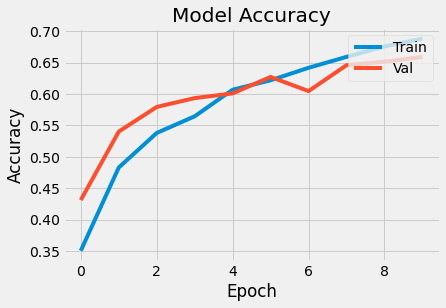

In [30]:
# Visualize model accuracy progression
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [32]:
# Test the model with examples
from google.colab import files
uploaded = files.upload()

Saving car.jpeg to car.jpeg


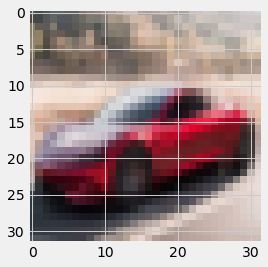

In [33]:
# Resize and show image
from skimage.transform import resize

test_image = plt.imread('car.jpeg')
resized = resize(test_image, (32,32,3))
img = plt.imshow(resized)

In [48]:
# Get model prediction and print in readable format
from collections import defaultdict

predictions = model.predict(np.array([resized]))[0]
prediction_map = defaultdict(float)

for i in range(10):
  prediction_map[i] = predictions[i]

sorted_prediction_map = dict(sorted(prediction_map.items(), 
                                    key=lambda item: item[1],
                                    reverse=True
                                    ))

print("In order of probability (highest to lowest) - ")
for key in sorted_prediction_map.keys():
  print(CLASSIFICATION[key])

In order of probability (highest to lowest) - 
automobile
truck
ship
airplane
cat
bird
dog
deer
frog
horse
